In [1]:
import pandas as pd
import numpy as np
import geopandas
import warnings
warnings.filterwarnings("ignore")

data=pd.read_csv("RIMResultatElection2019.csv",sep=";")
dff=data[['Wilaya','nbSuffrage','nbVoix','Candidat']]
dff.head(10)

,Wilaya,nbSuffrage,nbVoix,Candidat
0,Guidimagha,115,96,Mohamed Cheïkh Mohamed Ahmed ElGHAZOUANI (Ghaz...
1,Guidimagha,115,13,Sidi Mohamed Boubacar BOUSSALEF (Boubacar)
2,Guidimagha,115,6,Biram Dah Dah ABEID (Biram)
3,Guidimagha,115,0,Mohamed Sidi MAOULOUD (Maouloud)
4,Guidimagha,115,0,Mohamed Lemine El Mourteji El WAVI (Wavi)
5,Guidimagha,115,0,KANE Hamidou Baba (Kane)
6,Tagant,214,154,Mohamed Cheïkh Mohamed Ahmed ElGHAZOUANI (Ghaz...
7,Tagant,214,16,Sidi Mohamed Boubacar BOUSSALEF (Boubacar)
8,Tagant,214,16,Biram Dah Dah ABEID (Biram)
9,Tagant,214,27,Mohamed Sidi MAOULOUD (Maouloud)


In [2]:
dff['prenom']=dff['Candidat'].str.split("(", n=2, expand=True)[1]
dff['Prenom_cand']=dff['prenom'].str.split(")", n=1, expand=True)[0]

grouped_df = dff.groupby(['Prenom_cand','Wilaya']).sum().reset_index()
grouped_df['%voix']=round(grouped_df['nbVoix'])

resultat_par_wilaya=grouped_df.pivot(index='Wilaya',columns='Prenom_cand',values='%voix')

resultat_par_wilaya.columns.name=None
resultat_par_wilaya1=resultat_par_wilaya["Biram"].to_frame()
resultat_par_wilaya1.sort_values(by='Biram',inplace=True)
resultat_par_wilaya1

resultat_par_wilaya2=resultat_par_wilaya["Boubacar"].to_frame()
resultat_par_wilaya2.sort_values(by='Boubacar',inplace=True)
resultat_par_wilaya2

resultat_par_wilaya3=resultat_par_wilaya["Ghazouani"].to_frame()
resultat_par_wilaya3.sort_values(by='Ghazouani',inplace=True)
resultat_par_wilaya3

resultat_par_wilaya4=resultat_par_wilaya["Kane"].to_frame()
resultat_par_wilaya4.sort_values(by='Kane',inplace=True)
resultat_par_wilaya4


resultat_par_wilaya5=resultat_par_wilaya["Maouloud"].to_frame()
resultat_par_wilaya5.sort_values(by='Maouloud',inplace=True)
resultat_par_wilaya5


resultat_par_wilaya6=resultat_par_wilaya["Wavi"].to_frame()
resultat_par_wilaya6.sort_values(by='Wavi',inplace=True)


In [3]:
resultat_par_wilaya.head()

,Biram,Boubacar,Ghazouani,Kane,Maouloud,Wavi
Wilaya,,,,,,
Adrar,1508,5010,16955,228,792,61
Assaba,10702,8805,47275,921,1418,203
Brakna,10643,15940,46038,16836,1291,160
Dakhlet Nouadhibou,15587,10713,14248,5535,1075,273
Etranger,2667,1901,3553,1470,285,69


In [4]:
gdf = geopandas.read_file("C:/Users/hp/Downloads/shape/mrt_admbnda_adm2_gov_20200801.shp")

In [5]:
from bokeh.plotting import figure, show
from bokeh.colors import named
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool
import bokeh.io
import bokeh.plotting as bp
from math import pi
from bokeh.transform import dodge

from collections import Counter
from math import pi
import pandas as pd
from bokeh.palettes import Category20c
from bokeh.plotting import figure, show
from bokeh.transform import cumsum

In [6]:
moughataa_map = {
"akjoujt":"MR0901",
"aleg":"MR0301",
"amourj":"MR0701",
"aoujeft":"MR0101",
"arafat":"MR1001",
"atar":"MR0102",
"aioun":"MR0801",
"bababe":"MR0302",
"barkeol":"MR0201",
"bassiknou":"MR0702",
"bennechab":"MR0902",
"bir moghrein":"MR1301",
"boghe":"MR0303",
"boumdeid":"MR0202",
"boutilimit":"MR1201",
"chami":"MR0401",
"chinguitti":"MR0103",
"dar naim":"MR1002",
"djiguenni":"MR0703",
"el mina":"MR1003",
"f'deirick":"MR1302",
"ghabou":"MR0601",
"guerou":"MR0203",
"kankoussa":"MR0204",
"kaedi":"MR0501",
"keur macene":"MR1202",
"kiffa":"MR0205",
"koubenni":"MR0802",
"ksar":"MR1004",
"m'bagne":"MR0305",
"m'bout":"MR0503",
"maghama":"MR0502",
"magtalahjar":"MR0304",
"mederdra":"MR1203",
"monguel":"MR0504",
"moudjeria":"MR1101",
"n'beiket lahwach":"MR0705",
"nouadhibou":"MR0402",
"nema":"MR0704",
"ouad naga":"MR1204",
"ouadane":"MR0104",
"oualata":"MR0706",
"ould yenge":"MR0602",
"r'kiz":"MR1205",
"riyad":"MR1005",
"rosso":"MR1206",
"sebkha":"MR1006",
"selibaby":"MR0603",
"tamcheket":"MR0803",
"tevragh zeina":"MR1007",
"teyaret":"MR1008",
"tichit":"MR1102",
"tidjikja":"MR1103",
"timbedra":"MR0707",
"tintane":"MR0804",
"toujounine":"MR1009",
"zoueratt":"MR1303"}


In [7]:
data.head()

,CodeWilaya,Wilaya,Moughataa,Commune,Center,CodeCentre,CodeBureau,NbInscrits,nbVotant,nbVoteNull,nbVoteNeutre,nbSuffrage,nbVoix,Candidat
0,10,Guidimagha,Ghabou,Baydjam,Ecole Keleyle,7,1,164,120,5,0,115,96,Mohamed Cheïkh Mohamed Ahmed ElGHAZOUANI (Ghaz...
1,10,Guidimagha,Ghabou,Baydjam,Ecole Keleyle,7,1,164,120,5,0,115,13,Sidi Mohamed Boubacar BOUSSALEF (Boubacar)
2,10,Guidimagha,Ghabou,Baydjam,Ecole Keleyle,7,1,164,120,5,0,115,6,Biram Dah Dah ABEID (Biram)
3,10,Guidimagha,Ghabou,Baydjam,Ecole Keleyle,7,1,164,120,5,0,115,0,Mohamed Sidi MAOULOUD (Maouloud)
4,10,Guidimagha,Ghabou,Baydjam,Ecole Keleyle,7,1,164,120,5,0,115,0,Mohamed Lemine El Mourteji El WAVI (Wavi)


In [8]:
data['Moughataa'] = data['Moughataa'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
data['Moughataa']=data['Moughataa'].str.lower()

In [9]:
code=data['Moughataa'].map(moughataa_map)


In [10]:
dff=data[['Moughataa','nbSuffrage','nbVoix','Candidat']]
dff['prenom']=dff['Candidat'].str.split("(", n=2, expand=True)[1]
dff['Prenom_cand']=dff['prenom'].str.split(")", n=1, expand=True)[0]
dff=data[['Moughataa','nbSuffrage','nbVoix','Candidat']]
dff['prenom']=dff['Candidat'].str.split("(", n=2, expand=True)[1]
dff['Prenom_cand']=dff['prenom'].str.split(")", n=1, expand=True)[0]
grouped_df = dff.groupby(['Prenom_cand','Moughataa']).sum().reset_index()
grouped_df['%voix']=round(grouped_df['nbVoix']/grouped_df['nbSuffrage'],4)*100
resultat_par_moughataa=grouped_df.pivot(index='Moughataa',columns='Prenom_cand',values='%voix')
resultat_par_moughataa.columns.name=None
cand_gang=resultat_par_moughataa.idxmax(axis=1)
resultat_par_moughataa['Winner']=cand_gang


In [11]:
dff=data[['Moughataa','nbSuffrage','nbVoix','Candidat']]
dff['prenom']=dff['Candidat'].str.split("(", n=2, expand=True)[1]
dff['Prenom_cand']=dff['prenom'].str.split(")", n=1, expand=True)[0]

In [12]:
grouped_df = dff.groupby(['Prenom_cand','Moughataa']).sum().reset_index()
grouped_df['%voix']=round(grouped_df['nbVoix']/grouped_df['nbSuffrage'],4)*100
grouped_df

,Prenom_cand,Moughataa,nbSuffrage,nbVoix,%voix
0,Biram,afrique,3893,1009,25.92
1,Biram,aioun,17848,897,5.03
2,Biram,akjoujt,5774,300,5.20
3,Biram,aleg,31256,2324,7.44
4,Biram,amourj,19266,712,3.70
...,...,...,...,...,...
355,Wavi,tidjikja,12034,17,0.14
356,Wavi,timbedra,16428,84,0.51
357,Wavi,tintane,22043,84,0.38
358,Wavi,toujounine,28121,329,1.17


In [13]:
resultat_par_moughataa=grouped_df.pivot(index='Moughataa',columns='Prenom_cand',values='%voix')
resultat_par_moughataa.columns.name=None
resultat_par_moughataa.head()

,Biram,Boubacar,Ghazouani,Kane,Maouloud,Wavi
Moughataa,,,,,,
afrique,25.92,33.39,30.52,6.42,2.41,1.34
aioun,5.03,21.17,71.01,0.22,2.12,0.45
akjoujt,5.20,28.09,59.27,4.99,2.22,0.24
aleg,7.44,25.68,64.45,0.92,1.37,0.16
amourj,3.70,8.13,87.22,0.44,0.23,0.29


In [14]:
cand_gang=resultat_par_moughataa.idxmax(axis=1)
resultat_par_moughataa['Winner']=cand_gang

In [15]:
resultat_par_moughataa.head()

,Biram,Boubacar,Ghazouani,Kane,Maouloud,Wavi,Winner
Moughataa,,,,,,,
afrique,25.92,33.39,30.52,6.42,2.41,1.34,Boubacar
aioun,5.03,21.17,71.01,0.22,2.12,0.45,Ghazouani
akjoujt,5.20,28.09,59.27,4.99,2.22,0.24,Ghazouani
aleg,7.44,25.68,64.45,0.92,1.37,0.16,Ghazouani
amourj,3.70,8.13,87.22,0.44,0.23,0.29,Ghazouani


In [16]:
resultat_par_moughataa['Moughataa']=resultat_par_moughataa.index
code=resultat_par_moughataa['Moughataa'].map(moughataa_map)
resultat_par_moughataa['ADM2_PCODE']=code

In [17]:
dfgd_w = gdf.merge(resultat_par_moughataa, on='ADM2_PCODE')
dfgd_w.head()

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,...,validTo,geometry,Biram,Boubacar,Ghazouani,Kane,Maouloud,Wavi,Winner,Moughataa
0,7.796904,1.345188,Akjoujt,MR0901,None,None,None,Inchiri,MR09,Mauritania,...,None,"POLYGON ((-15.22120 19.01120, -15.23970 19.016...",5.20,28.09,59.27,4.99,2.22,0.24,Ghazouani,akjoujt
1,5.166369,1.331737,Aleg,MR0301,None,None,None,Brakna,MR03,Mauritania,...,None,"POLYGON ((-13.24680 17.30210, -13.20140 17.262...",7.44,25.68,64.45,0.92,1.37,0.16,Ghazouani,aleg
2,3.972024,0.766927,Amourj,MR0701,None,None,None,Hodh El Chargi,MR07,Mauritania,...,None,"POLYGON ((-7.14390 16.10210, -7.12260 16.09840...",3.70,8.13,87.22,0.44,0.23,0.29,Ghazouani,amourj
3,6.744630,2.102095,Aoujeft,MR0101,None,None,None,Adrar,MR01,Mauritania,...,None,"POLYGON ((-11.87150 19.19730, -12.08620 19.067...",1.32,13.98,77.21,0.37,6.96,0.16,Ghazouani,aoujeft
4,0.150527,0.001420,Arafat,MR1001,None,None,None,Nouakchott,MR10,Mauritania,...,None,"POLYGON ((-15.94080 18.05020, -15.94270 18.047...",16.80,27.92,44.28,6.42,3.87,0.71,Ghazouani,arafat


Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

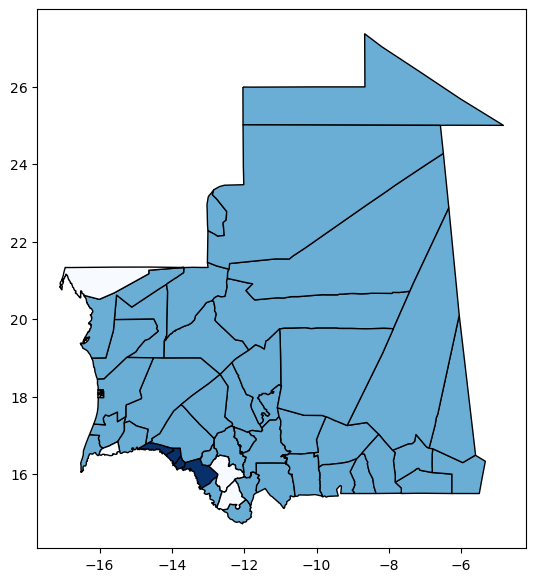

In [18]:
from bokeh.plotting import figure, show
from bokeh.colors import named
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool
import bokeh.io
bokeh.io.reset_output()
bokeh.io.output_notebook()
from matplotlib import pyplot as plt
dfgd_w.plot("Winner",figsize=(7,7), colormap='Blues',edgecolor='black')


### diagramme en barre
from bokeh.plotting import figure, show
from bokeh.colors import named
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool

from bokeh.layouts import gridplot
import bokeh.io
import bokeh.plotting as bp
from math import pi
from bokeh.transform import dodge

bokeh.io.reset_output()
bokeh.io.output_notebook()

from bokeh.plotting import figure, show
from bokeh.colors import named
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool
import bokeh.io
bokeh.io.reset_output()
bokeh.io.output_notebook()
from matplotlib import pyplot as plt


source= ColumnDataSource(resultat_par_wilaya1)
p = figure(y_range=source.data['Wilaya'].tolist(),toolbar_location=None,tools="",title='Result per wilaya for candidate Biram')
#p.hbar(y=dodge('Wilaya',0.25, range=p.y_range), right='Biram',width=0.01, source=source,color="#c9d9d3", legend_label="Biram")
p.hbar(y='Wilaya', right='Biram', height=0.7 ,color="#c9d9d3", source=source)
p.legend.location = "bottom_right"

source1= ColumnDataSource(resultat_par_wilaya2)
p1 = figure(y_range=source1.data['Wilaya'].tolist(),toolbar_location=None,tools="",title='Result per wilaya for candidate Boubacar')
p1.hbar(y='Wilaya', right='Boubacar', height=0.7 ,color="#008000", source=source1)
#p1.hbar(y=dodge('Wilaya',0.05, range=p1.y_range), right='Boubacar', width=0.01, source=source1,color="#008000", legend_label="Boubacar")
p1.legend.location = "bottom_right"

source2= ColumnDataSource(resultat_par_wilaya3)
p2= figure(y_range=source2.data['Wilaya'].tolist(),toolbar_location=None,tools="",title='Result per wilaya for candidate Ghazouani')
p2.hbar(y='Wilaya', right='Ghazouani', height=0.7 ,color="#6495ED", source=source2)
#p2.hbar(y=dodge('Wilaya', 0.05, range=p2.y_range), right='Ghazouani', width=0.01, source=source2,color="#6495ED", legend_label="Ghazouani")
p2.legend.location = "bottom_right"

source3= ColumnDataSource(resultat_par_wilaya4)
p3= figure(y_range=source3.data['Wilaya'].tolist(),toolbar_location=None,tools="",title='Result per wilaya for candidate Kane')
#p3.hbar(y=dodge('Wilaya',  0.05,  range=p3.y_range), right='Kane', width=0.1, source=source3,color="#3CB371", legend_label="Kane")
p3.hbar(y='Wilaya', right='Kane', height=0.7 ,color="#3CB371", source=source3)
p3.legend.location = "bottom_right"

source4= ColumnDataSource(resultat_par_wilaya5)
p4= figure(y_range=source4.data['Wilaya'].tolist(),toolbar_location=None,tools="",title='Result per wilaya for candidate Maouloud')
#p4.hbar(y=dodge('Wilaya', 0.05, range=p4.y_range), right='Maouloud', width=0.1, source=source4,color=named.darkorange, legend_label='Maouloud')
p4.hbar(y='Wilaya', right='Maouloud', height=0.7,color="darkorange", source=source4)
p4.legend.location = "bottom_right"


source5= ColumnDataSource(resultat_par_wilaya6)
p5= figure(y_range=source5.data['Wilaya'].tolist(),toolbar_location=None,tools="",title='Result per wilaya for candidate Wavi')
p5.hbar(y='Wilaya', right='Wavi', height=0.7 ,color="black", source=source5)
#p5.hbar(y=dodge('Wilaya',  0.05, range=p5.y_range), right='Wavi', width=0.1, source=source5,color=named.black, legend_label='Wavi')
p5.legend.location = "bottom_right"


layout = gridplot([[p, p1,], [p2, p3,],[p4, p5]], toolbar_location=None,  merge_tools=True, width=400, height=300)

show(layout)


In [19]:
dfgd_w.explore(column="Winner")